<a href="https://colab.research.google.com/github/srushtipatil14/Spark_foundation_Internship/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('SampleSuperstore.csv')

In [7]:
print(df.head())
print(df.info())
print(df.describe())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [8]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [9]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
print(df['Category'].value_counts())
print(df['Region'].value_counts())

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64
West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64


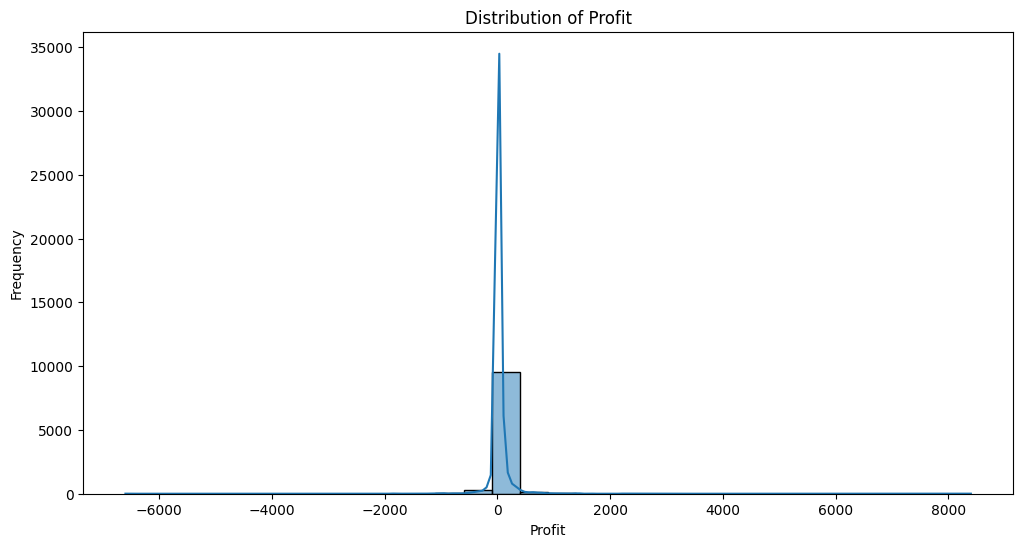

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [13]:
category_profit = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
print(category_profit)

Category
Technology         78.752002
Office Supplies    20.353403
Furniture           8.697740
Name: Profit, dtype: float64


In [14]:
region_profit = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
print(region_profit)

Region
West       33.927281
East       32.163905
South      28.857673
Central    17.100421
Name: Profit, dtype: float64


In [18]:
discount_impact = df.groupby('Discount')['Profit'].mean()
print(discount_impact)

Discount
0.00     67.024108
0.10     96.055074
0.15     27.288298
0.20     24.721217
0.30    -45.828401
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -102.116395
Name: Profit, dtype: float64


In [30]:
df['New_Column_1'] = df['Segment']

# Example 2: Create a new column based on the 'City' column
df['New_Column_2'] = df['City']

# Example 3: Create a new column based on the 'Country' column
df['New_Column_3'] = df['Country']

# Print the updated DataFrame
print(df.head())


        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit New_Column_1     New_Column_2   New_Column_3  
0      0.00   41.9136  

<ipython-input-17-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


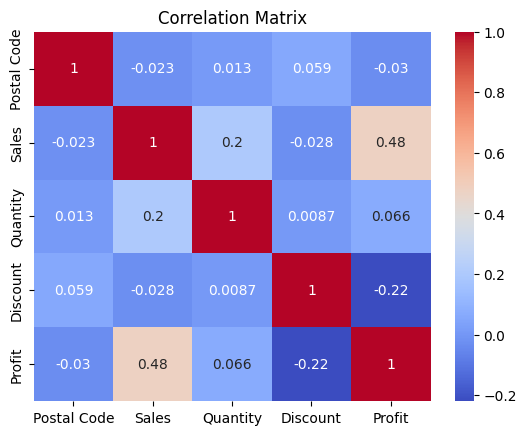

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Business Problem 2: Determine which products or categories have the highest and lowest sales volumes
product_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
print(product_sales.head())
print(product_sales.tail())

Ship Mode
Standard Class    1.357316e+06
Second Class      4.591770e+05
First Class       3.513805e+05
Same Day          1.283217e+05
Name: Sales, dtype: float64
Ship Mode
Standard Class    1.357316e+06
Second Class      4.591770e+05
First Class       3.513805e+05
Same Day          1.283217e+05
Name: Sales, dtype: float64
